# Simple Scatter Plots
both ways work
+ ``plt.plot`` fast speed
+ ``plot.scatter`` more flexibility

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

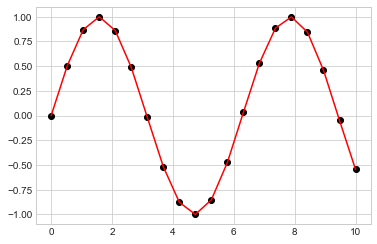

In [9]:
x = np.linspace(0, 10, 20)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')
plt.plot(x, y, color='red') # compare with the line plot

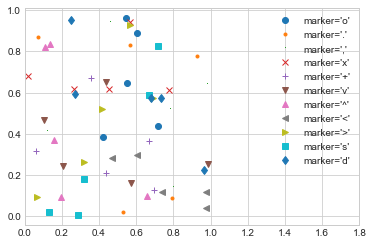

In [10]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

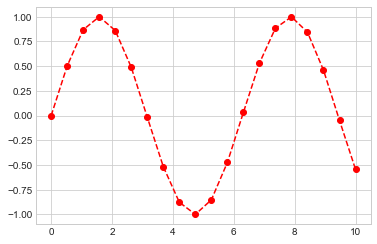

In [13]:
#these character codes can be used together with line and color codes to plot points along with a line connecting them:
plt.plot(x, y, '--or');

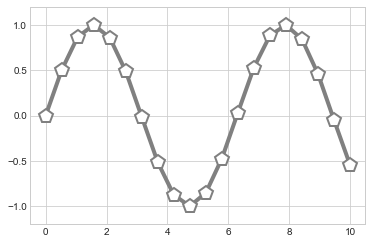

In [17]:
# some more parameters can be specified in the plot
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with ``plt.scatter``

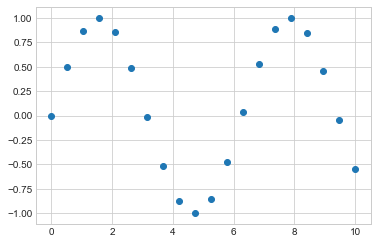

In [20]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

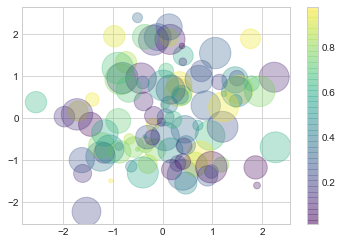

In [23]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis') # ``alpha`` keyword to adjust the transparency level
plt.colorbar();  # show color scale

(4, 150)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


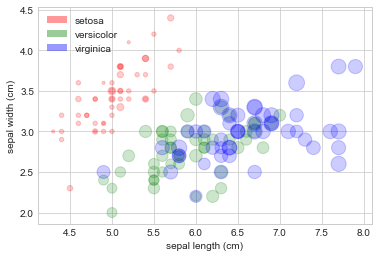

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
print(features.shape)
print(iris.feature_names)
print(iris.target_names)
colormap = ['red', 'green', 'blue']
dotcolor = [colormap[dot] for dot in iris.target]

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=dotcolor)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## how to add lengend for colors?
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=iris.target_names[i], alpha = 0.4) for i in range(3)]

plt.legend(handles=legend_elements, loc='upper left')

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.